# Data Preprocessing Notes for labquake experiment b726
Author: Jakob Poffley  
Date: 17/01/2024

Data exploration and notes on the pre-processing in utils/load.py for the Mele Veedu Labquake experiment b726.

Code largely copied from Camilla (CGB47 - 001 Data Preprocessing Notes i417.ipynb)

In [3]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

MAIN_DICT = "/gws/nopw/j04/ai4er/users/jpoff/earthquake-predictability"
sys.path.append(MAIN_DICT)

from utils.dataset import SlowEarthquakeDataset

## Raw Data

In [13]:
# Directories paths
GTC_DATA_DIR = "/gws/nopw/j04/ai4er/users/jpoff/earthquake-predictability/data/gtc_quakes_data"
LABQUAKES_DATA_DIR = f"{GTC_DATA_DIR}/labquakes"
MELEVEEDU_DATA_DIR = f"{LABQUAKES_DATA_DIR}/MeleVeeduetal2020"

# Open b726 experiment in a dataframe
b726_FILE_PATH = f"{MELEVEEDU_DATA_DIR}/b726/b726.txt"
with open(b726_FILE_PATH, "r") as file:
    df = pd.read_csv(
        file, delim_whitespace=True, header=0, index_col=0, low_memory=False
    )

# Remove units
df = df.iloc[1:, :]

# Handle exception for space in "# Rec" column name creating two separate columns
cols = list(df.keys()) + [""]  # create a new cols list
df.columns = cols[1:]  # remove the first
df.pop(df.columns[-1])  # pop the last column

df

,lp_disp,LT,Tau,SigN,dcdtOB,slip,Time,Rec.1,timedcdt,ec_disp,mu,Shear_Strain,Slip,velocity
#,,,,,,,,,,,,,,
0,-0.0000000000,3.3908619047,0.0000000000,0.0000001000,0.0000000000,0.0000000000,0.0000000000,-0.1000000000,-0.0000000000,0.0000000000,-0.0000000000,0.0000000000,NaN,NaN
1,-0.0000000000,3.3908609047,0.0000000000,0.0000001000,0.0000000000,1.0000000000,1.0000000000,0.9000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,NaN,NaN
2,-0.0000000000,3.3908609047,0.0000000000,0.0000001000,0.0000000000,2.0000000000,2.0000000000,1.9000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,NaN,NaN
3,-0.0000000000,3.3908584047,0.0000000000,0.0000001000,0.0000000000,3.0000000000,3.0000000000,2.9000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,NaN,NaN
4,-0.0000000000,3.3908579047,0.0000000000,0.0000001000,0.0000000000,4.0000000000,4.0000000000,3.9000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185911,29834.6120000000,0.5581698047,9.4227376000,14.9877985000,16998.5380811000,10232.4400000000,185911.0000000000,10232.3400000000,29.7539385691,0.6286939072,30.5158597876,23.2837349995,NaN,NaN
185912,29832.7090000000,0.5581078743,9.4100744000,15.0085913000,16998.8485309000,10232.4500000000,185912.0000000000,10232.3500000000,29.7521439860,0.6269791889,30.5126444888,20.7450100018,NaN,NaN
185913,29833.7840000000,0.5581560175,9.4108170000,14.9973981000,16998.9529813000,10232.4600000000,185913.0000000000,10232.3600000000,29.7532126282,0.6274966456,30.5145591654,20.2372650016,NaN,NaN


<Axes: xlabel='Time'>

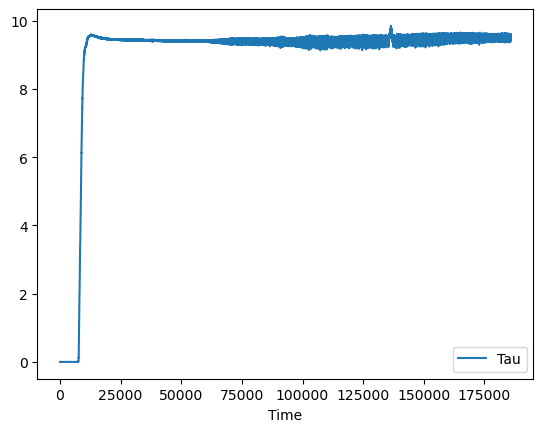

In [32]:
# Visualise full raw data
df = df.apply(pd.to_numeric)
df.plot(x="Time", y="Tau")

## Pre-processed Data

In [12]:
# Access b726 and output dataframe head using Pritt's data loaders (which utilises Adriano's loading + pre-processing)
dataset = SlowEarthquakeDataset(["b726"])
dataset.load()

# Get data outputs
ds_exp = dataset["b726"]

ds_exp


X, Y, t = ds_exp["X"], ds_exp["Y"], ds_exp["t"]


# Create dataframe
df_processed = pd.DataFrame(
    np.hstack((X, Y, t.reshape(-1, 1))),
    columns=[ds_exp["hdrs"]["X"], *ds_exp["hdrs"]["Y"], ds_exp["hdrs"]["t"]],
)

df_processed

,det_shear_stress,obs_shear_stress,obs_normal_stress,obs_ecdisp,obs_shear_strain,time
0,0.112433,9.515997,15.003165,21.927258,18.706851,0.00
1,0.116169,9.519734,15.006345,21.927536,18.707201,0.01
2,0.114211,9.517776,14.988926,21.927373,18.706995,0.02
3,0.120005,9.523571,15.009077,21.927632,18.707321,0.03
4,0.118803,9.522370,14.996757,21.927744,18.707461,0.04
...,...,...,...,...,...,...
19996,-0.033573,9.390598,15.013411,23.928238,21.337625,199.96
19997,-0.032795,9.391377,14.988898,23.928480,21.337958,199.97
19998,-0.034675,9.389498,15.013848,23.928157,21.337515,199.98
19999,-0.035563,9.388610,14.993769,23.928260,21.337656,199.99


## Notes on pre-processing

Pre-processing steps all seem identical to other Mele Veedu lab experiment datasets with sampled data range (time) 3650-3850.